In [55]:
import etherscan
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt # importing matplotlib
import numpy as np # importing numpy
import time

from dotenv import load_dotenv
from datetime import datetime
from web3 import Web3
from os import getenv
from tqdm import tqdm
from decimal import Decimal

In [2]:
load_dotenv()


es = etherscan.Client(api_key=getenv('ETHERSCAN'))
w3 = Web3(Web3.HTTPProvider(getenv('INFURA')))

w3.isConnected()

True

In [ ]:
# address book
carlisle = '0xd791427e372186E90637caF1D6D6AFb054BeeC7A'
rarible = '0xcd4EC7b66fbc029C116BA9Ffb3e59351c20B5B06'
opensea = '0x7Be8076f4EA4A4AD08075C2508e481d6C946D12b'
foundation = '0xcDA72070E455bb31C7690a170224Ce43623d0B6f'
superrare = '0x41A322b28D0fF354040e2CbC676F0320d8c8850d'
knownorigin = '0x848b0EA643e5a352D78e2c0c12A2dD8c96feC639'

In [78]:
def get_balance(wallet):
    wei = w3.eth.get_balance(wallet)
    return w3.fromWei(wei, 'ether')

In [79]:
get_balance(carlisle)

Decimal('0.182801517568856907')

In [75]:
def mp_transactions(address):
    columns = ['timestamp', 'block_number', 'from', 'to', 'input', 'hash', 'value', 'gas', 
                'gas_price', 'gas_used', 'nonce', 'confirmations', 'is_error', 'tx_receipt_status', 
                'transaction_index', 'cumulative_gas_used', 'block_hash']

    transactions = []

    latest_block = w3.eth.get_block('latest')
    end_block = latest_block['number']
    start_block = end_block - (6500 * 5)

    for l in tqdm(es.get_transactions_by_address(address, start_block=start_block, end_block=end_block, limit=9999)):
        time.sleep(.2)
        transactions.append(l)

    df = pd.DataFrame(transactions, columns=columns)
    df['timestamp'] = df['timestamp'].apply(datetime.fromtimestamp)
    df = df[df['value'] != 0]
    df = df.reset_index(drop=True)
    df['value'] = [w3.fromWei(x, 'ether') for x in df['value']]
    return df

In [80]:
foundation_df = mp_transactions(foundation)

 45%|████▌     | 3385/7470 [10:00:05<12:04:11, 10.64s/it]


KeyboardInterrupt: 

In [77]:
superrare_df

,timestamp,block_number,from,to,input,hash,value,gas,gas_price,gas_used,nonce,confirmations,is_error,tx_receipt_status,transaction_index,cumulative_gas_used,block_hash
0,2021-03-25 22:45:16,12112240,0xcc6c1d21e8474b3578e69eb036c712ab08ffdfbb,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0x454a2ab3000000000000000000000000000000000000...,0x10ccb19cabad8b68ab43714806ad8bc49b6fd5dcc339...,50,102793,130000000000,68529,277,32278,False,True,139,10469759,0xcdda7e394ca01f974c79d48713c750323cbc74d8c685...
1,2021-03-25 23:19:14,12112402,0xcc6c1d21e8474b3578e69eb036c712ab08ffdfbb,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0x454a2ab3000000000000000000000000000000000000...,0x6b9fee965a5615ecfff7c49c60a9ad52342e19015330...,10,102811,113000000000,68541,279,32116,False,True,122,9067380,0xef9999662d8197607e588b6cc333f596e92b8a13c98f...
2,2021-03-25 23:27:04,12112433,0xcc6c1d21e8474b3578e69eb036c712ab08ffdfbb,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0x454a2ab3000000000000000000000000000000000000...,0x31efdede4ddf67cff991aaf06f02da32136f3ac9d8fa...,4.3,102811,110000000000,68541,280,32085,False,True,244,12391437,0x4f4f2366d5b248db8811b75a9351167e109a974f93f5...
3,2021-03-26 00:26:37,12112729,0xf2b9ec5724dc97362a53907c0b4cc0aa72369e63,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0xd96a094a000000000000000000000000000000000000...,0xf0df6bb4765e1656c44504b472cd83ccc84bea7d3bfb...,0.764,341173,92000001459,25969,81,31789,True,False,131,9725658,0x56d9860b9b07d3c8f97af3280eed79f10d76b27e2d1a...
4,2021-03-26 01:43:22,12113079,0x57561dd1bb1887d9734a854f82d0d6cd8c988ff6,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0xd96a094a000000000000000000000000000000000000...,0x383fd423acfdbecbd6e3deb064b7f66948c242bdf1ea...,1.2,231394,93000001459,120063,162,31439,False,True,130,11719425,0xf1758a0e7884915395a0bf31db32f1a822716af9082d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2021-03-30 18:12:29,12143574,0x0b8f4c4e7626a91460dac057eb43e0de59d5b44f,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0xd96a094a000000000000000000000000000000000000...,0x94c83acb757bcd82a679583843351d2a63b8137af12f...,2,225076,113000000000,111651,115,944,False,True,129,11117265,0x7e790ea14dd27b805c5316686d2dce9a9c594863bb99...
145,2021-03-30 20:55:31,12144287,0x6d938cbe86b4763691f702577d4046f656acb3c8,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0x454a2ab3000000000000000000000000000000000000...,0xcce682b990f076c948ce9f79bd9a6141fb4a988e8180...,0.3,102811,135000001347,68541,788,231,False,True,88,8360700,0xe499773aa4ca2f5a26d59c427180d2bf4094e7668103...
146,2021-03-30 20:59:43,12144301,0x6d938cbe86b4763691f702577d4046f656acb3c8,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0x454a2ab3000000000000000000000000000000000000...,0x66c3c62abf94d29a05b1a8346a9bdbae1ba28694993c...,0.3,102811,139000000000,68541,789,217,False,True,102,6900966,0x78e431f30a4e197822bd99064c8117019e47193230aa...
147,2021-03-30 21:08:39,12144336,0x6d938cbe86b4763691f702577d4046f656acb3c8,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0x454a2ab3000000000000000000000000000000000000...,0xa305408f60f7971ff0d39cb06158c1930e6c35ecd740...,0.3,102811,139000001459,68541,790,182,False,True,143,8387314,0x528da2126e8b94b8d8c2080cfa7f8ca3ce3e5ff65663...


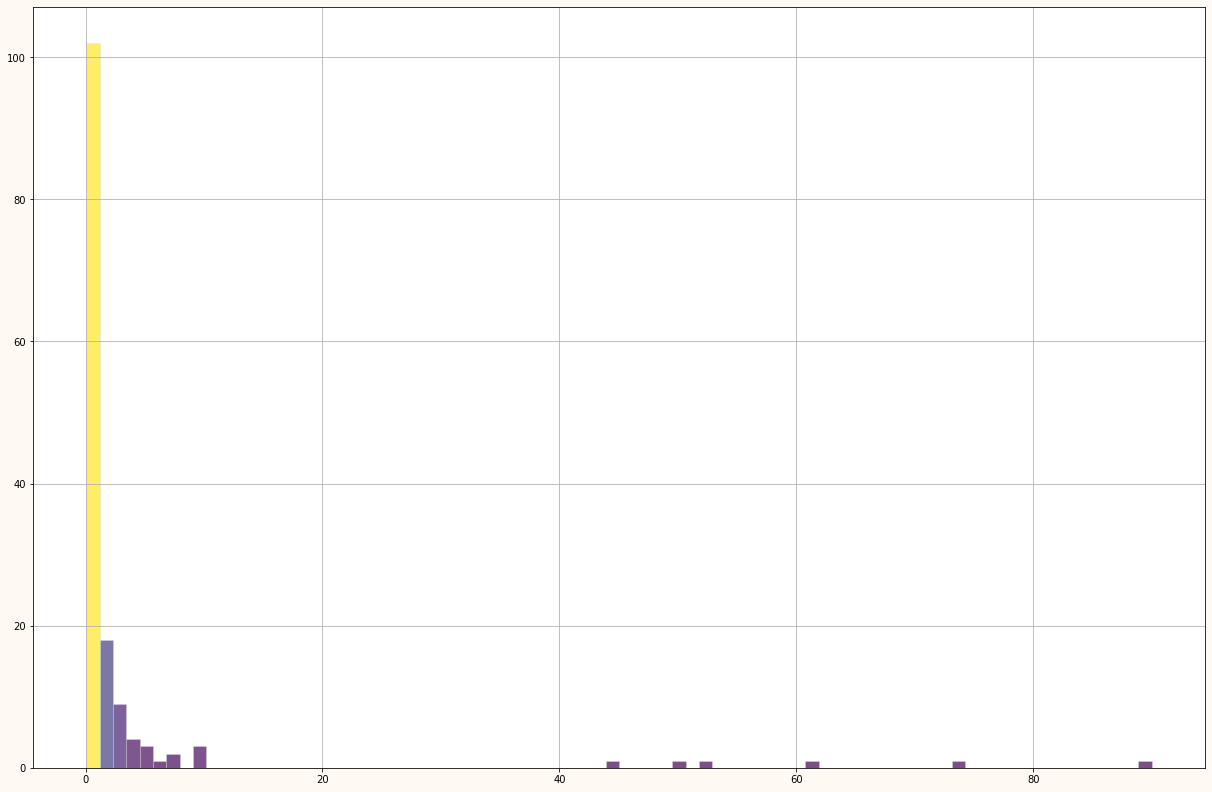

In [74]:
plt.style.use("fast")
plt.figure(figsize=(21,14), facecolor=('#fff9f4')) # Make it 14x7 inch

x = superrare_df["value"] # normal distribution
n, bins, patches = plt.hist(x, bins=80, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
n = n.astype('int') # it MUST be integer

# Good old loop. Choose colormap of your taste
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))

# Add title and labels with custom font sizes
plt.title('', fontsize=12)
plt.xlabel('', fontsize=8)
plt.ylabel('', fontsize=8)
plt.grid(b=None)
plt.savefig('foo.png')
plt.show();